In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('Salary_Data.csv')
string_columns=["Years of Experience","Interview Score","Salary"]

In [13]:
data.head(10)

,Years of Experience,Interview Score,Salary
0,1,8.0,28000
1,3,6.0,32000
2,1,4.0,24000
3,2,NaN,29000
4,3,7.0,32000
5,3,9.0,36000
6,3,NaN,30000
7,3,2.0,28000
8,6,6.0,57000
9,7,3.0,60000


In [16]:
data.tail(10)

,Years of Experience,Interview Score,Salary
90,7,7.0,55000
91,9,5.0,90000
92,6,9.0,55000
93,3,9.0,32000
94,2,8.0,26000
95,11,8.0,87000
96,13,10.0,92000
97,14,10.0,95000
98,15,10.0,110000
99,11,9.0,100000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  100 non-null    int64  
 1   Interview Score      98 non-null     float64
 2   Salary               100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [18]:
data.describe()

,Years of Experience,Interview Score,Salary
count,100.000000,98.000000,100.000000
mean,5.970000,6.642857,59743.000000
std,3.726658,2.216387,29932.801018
min,0.000000,2.000000,21000.000000
25%,3.000000,5.000000,32000.000000
50%,6.000000,7.000000,53500.000000
75%,8.000000,9.000000,85250.000000
max,15.000000,10.000000,140000.000000


In [19]:
data.isin([0]).sum(axis=0)

Years of Experience    4
Interview Score        0
Salary                 0
dtype: int64

<Axes: xlabel='Years of Experience'>

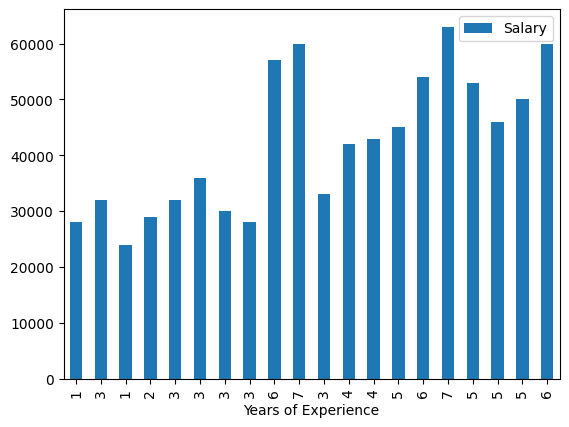

In [20]:
data.head(20).plot.bar(x="Years of Experience",y="Salary")

<Axes: xlabel='Interview Score'>

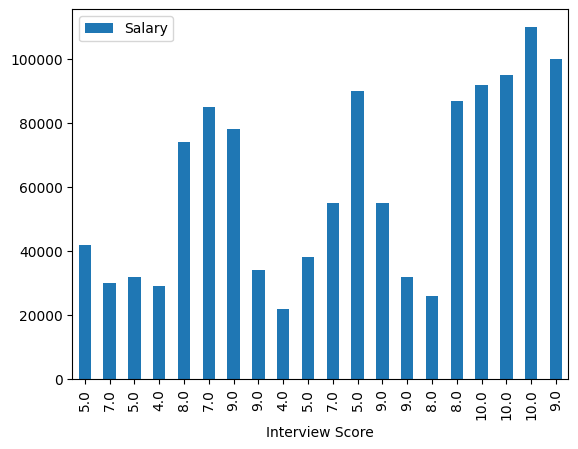

In [21]:
data.tail(20).plot.bar(x="Interview Score", y="Salary")

<Axes: xlabel='Years of Experience', ylabel='Interview Score'>

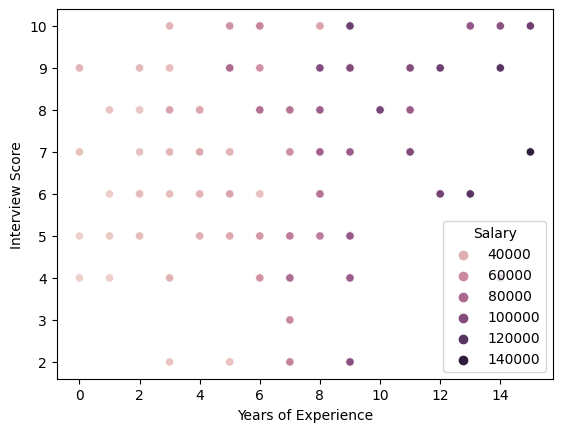

In [22]:
sns.scatterplot(data=data,x='Years of Experience',y='Interview Score', hue='Salary')

<Axes: xlabel='Salary'>

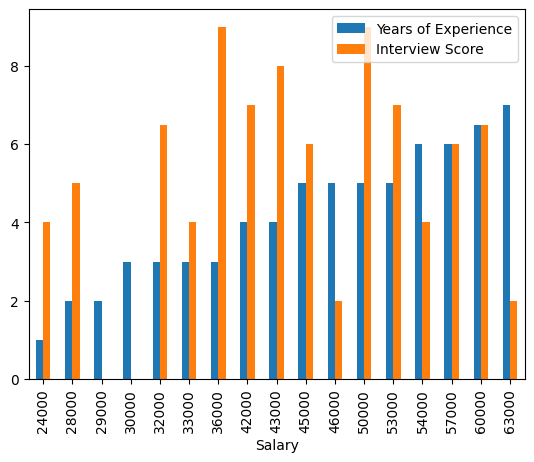

In [23]:
data.head(20).groupby('Salary').mean().plot(kind='bar')

<Axes: xlabel='Salary'>

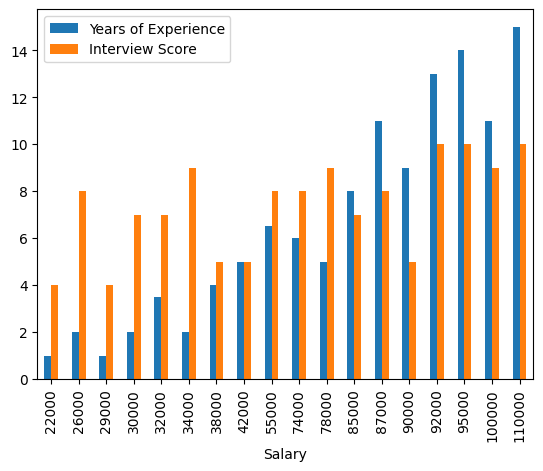

In [24]:
data.tail(20).groupby('Salary').mean().plot(kind='bar')

In [25]:
data["Salary"]

0      28000
1      32000
2      24000
3      29000
4      32000
       ...  
95     87000
96     92000
97     95000
98    110000
99    100000
Name: Salary, Length: 100, dtype: int64

In [26]:
for c in data.columns:
    print ("---- %s ---" % c)
    print (data[c].value_counts())


---- Years of Experience ---
Years of Experience
3     12
2     10
7     10
9     10
6      9
5      9
8      9
4      7
1      6
11     4
0      4
14     3
13     2
12     2
15     2
10     1
Name: count, dtype: int64
---- Interview Score ---
Interview Score
9.0     16
7.0     15
6.0     14
4.0     13
5.0     13
8.0     11
10.0    10
2.0      5
3.0      1
Name: count, dtype: int64
---- Salary ---
Salary
32000     7
36000     6
110000    5
30000     5
72000     4
55000     4
88000     3
22000     3
100000    3
29000     3
34000     2
67000     2
26000     2
120000    2
78000     2
92000     2
85000     2
28000     2
42000     2
60000     2
46000     2
45000     2
57000     1
33000     1
37000     1
105000    1
35000     1
108000    1
99000     1
23000     1
70000     1
24000     1
74000     1
38000     1
90000     1
87000     1
21000     1
50000     1
62000     1
54000     1
84000     1
98000     1
53000     1
106000    1
63000     1
140000    1
74500     1
86000     1
52000     1
4400

In [27]:
data.isna().sum()

Years of Experience    0
Interview Score        2
Salary                 0
dtype: int64

In [34]:
data.dropna(inplace=True)

In [35]:
data.isna().sum()

Years of Experience    0
Interview Score        0
Salary                 0
dtype: int64

In [37]:
X = data.iloc[:,0:1].values
y = data.iloc[:, 2].values

In [38]:
# Fit Regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

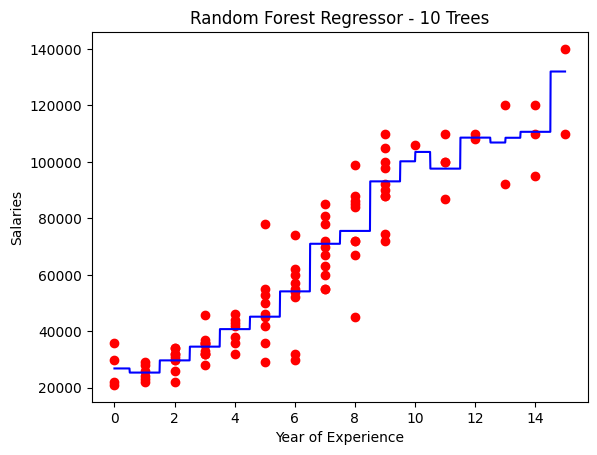

In [39]:
# Visualize
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Random Forest Regressor - 10 Trees")
plt.xlabel("Year of Experience")
plt.ylabel("Salaries")
plt.show()

In [40]:
#  Predict
y_pred = regressor.predict([[6]])
print('The predicted salary of a 6 years experiene person is ',y_pred)

The predicted salary of a 6 years experiene person is  [54133.53174603]


In [41]:
#Increase number of tree’s to 100
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

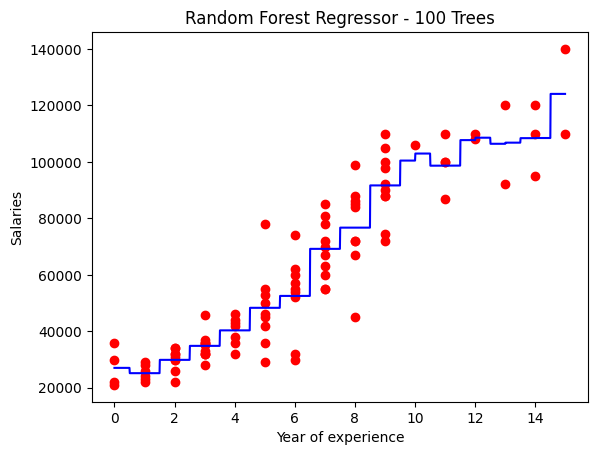

In [42]:
#visualize
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Random Forest Regressor - 100 Trees")
plt.xlabel("Year of experience")
plt.ylabel("Salaries")
plt.show()

In [43]:
# X_grid

array([[0.000e+00],
       [1.000e-02],
       [2.000e-02],
       ...,
       [1.497e+01],
       [1.498e+01],
       [1.499e+01]])

In [44]:
y_pred = regressor.predict([[6]])
print('The predicted salary of a person in 6 years experience is ',y_pred)

The predicted salary of a person in 6 years experience is  [52522.90759241]


In [45]:
#Increase number of tree’s to 300
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=0)

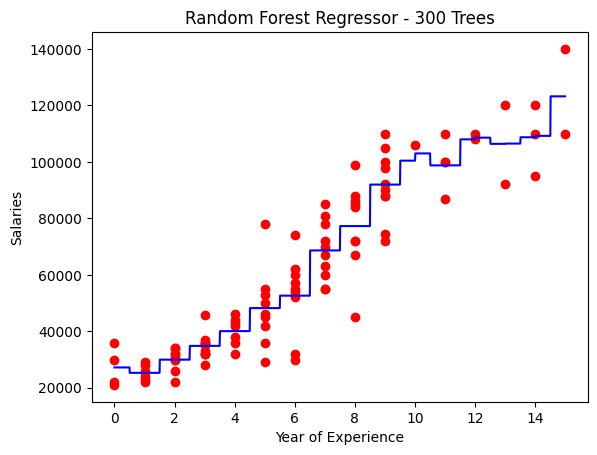

In [47]:
# import numpy as np
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X, y, color="red")
plt.plot(X_grid, regressor.predict(X_grid), color="blue")
plt.title("Random Forest Regressor - 300 Trees")
plt.xlabel("Year of Experience")
plt.ylabel("Salaries")
plt.show()

In [48]:
y_pred = regressor.predict([[6]])
print('The predicted salary of a person in 6 years experience is ',y_pred)

The predicted salary of a person in 6 years experience is  [52612.39700796]


In [49]:
import pickle

In [50]:
# Saving model using pickle
pickle.dump(regressor, open('model.pkl','wb'))

In [53]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))
print(model.predict([[5]]))

[48207.25104607]
